In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

In [2]:
from matplotlib import rcParams
pd.set_option('display.max_columns', None)


rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
data = pd.read_csv('train.csv', sep=';')

# Dokumentasi & Catatan

## 01. Info Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 02. Pengelompokan Dataset

In [5]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job','marital','education','default','housing','loan','contact','poutcome','y']
nums = ['age','balance','duration','campaign','pdays','previous']
timestamp = ['day','month']

## 03. Sample / Describe

In [6]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2811,46,blue-collar,single,secondary,no,2401,yes,no,unknown,14,may,218,2,-1,0,unknown,no
17679,34,technician,single,secondary,no,475,yes,no,cellular,29,jul,538,8,-1,0,unknown,no
11510,55,housemaid,married,primary,no,2152,no,no,unknown,19,jun,922,2,-1,0,unknown,yes
44873,35,technician,married,tertiary,no,0,yes,yes,cellular,23,sep,112,1,62,6,other,no
23936,55,blue-collar,married,primary,no,771,no,no,cellular,29,aug,98,19,-1,0,unknown,no
41642,29,admin.,single,tertiary,no,14,no,no,cellular,29,sep,87,1,120,1,failure,no
24088,37,admin.,married,secondary,no,1967,no,no,telephone,27,oct,376,1,-1,0,unknown,yes
17614,43,entrepreneur,married,tertiary,no,210,no,no,cellular,29,jul,646,2,-1,0,unknown,no
7902,39,services,single,secondary,no,-189,yes,no,unknown,30,may,76,9,-1,0,unknown,no
14490,34,services,married,secondary,no,0,yes,no,cellular,14,jul,78,4,-1,0,unknown,no


In [7]:
data[nums].describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data[cats].describe()

,job,marital,education,default,housing,loan,contact,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,36959,39922


# Data Cleansing

## a. Handle Missing Value

In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## b. Handle Duplicated Data

In [10]:
data.duplicated().sum()

0

In [11]:
drop_duplicated = data.duplicated(subset=['age','job','marital','education','default','housing',
                        'loan','contact','loan','contact','duration',
                       'campaign','pdays','previous','poutcome']).sum()
print(f'Jumlah row duplicated sebelum dihapus {drop_duplicated}')

data.drop_duplicates(subset=['age','job','marital','education','default','housing',
                             'loan','contact','duration','campaign','pdays',
                             'previous','poutcome'], inplace=True)

drop_duplicated_after = data.duplicated(subset=['age','job','marital','education','default','housing',
                                                'loan','contact','duration','campaign','pdays',
                                                'previous','poutcome']).sum()
print(f'Jumlah row duplicated setelah dihapus: {drop_duplicated_after}')

Jumlah row duplicated sebelum dihapus 108
Jumlah row duplicated setelah dihapus: 0


In [12]:
# Info Setelah di handle duplicate
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45103 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45103 non-null  int64 
 1   job        45103 non-null  object
 2   marital    45103 non-null  object
 3   education  45103 non-null  object
 4   default    45103 non-null  object
 5   balance    45103 non-null  int64 
 6   housing    45103 non-null  object
 7   loan       45103 non-null  object
 8   contact    45103 non-null  object
 9   day        45103 non-null  int64 
 10  month      45103 non-null  object
 11  duration   45103 non-null  int64 
 12  campaign   45103 non-null  int64 
 13  pdays      45103 non-null  int64 
 14  previous   45103 non-null  int64 
 15  poutcome   45103 non-null  object
 16  y          45103 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


## c. Handle Outlier

### - Outlier Checking (Numerik)

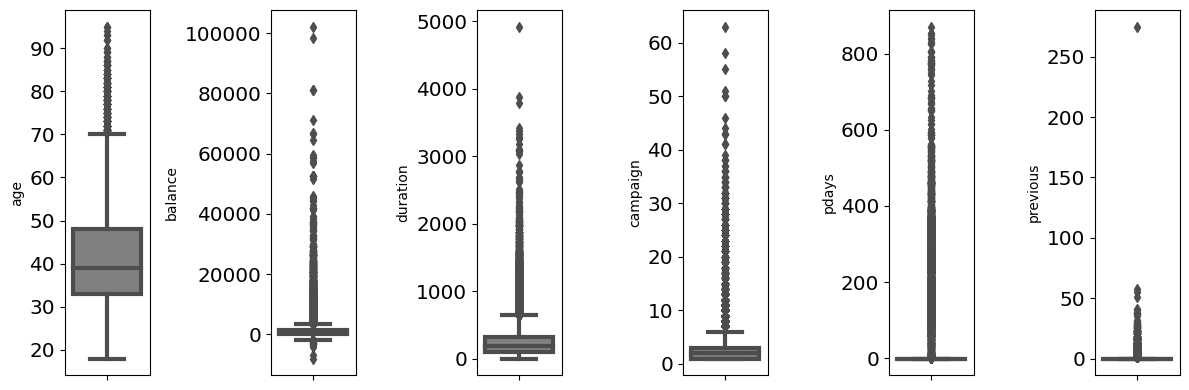

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()
    
plt.show()

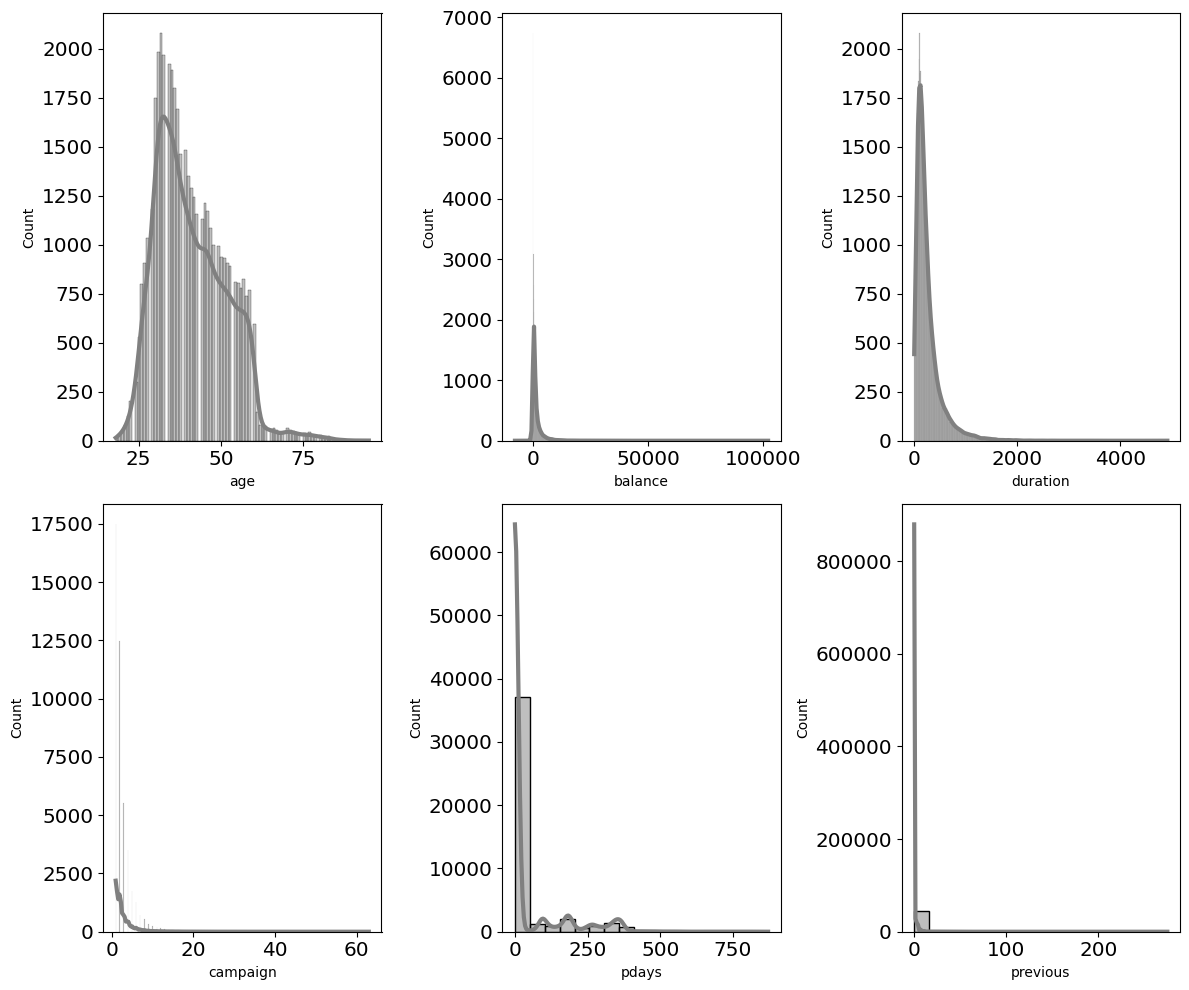

In [14]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

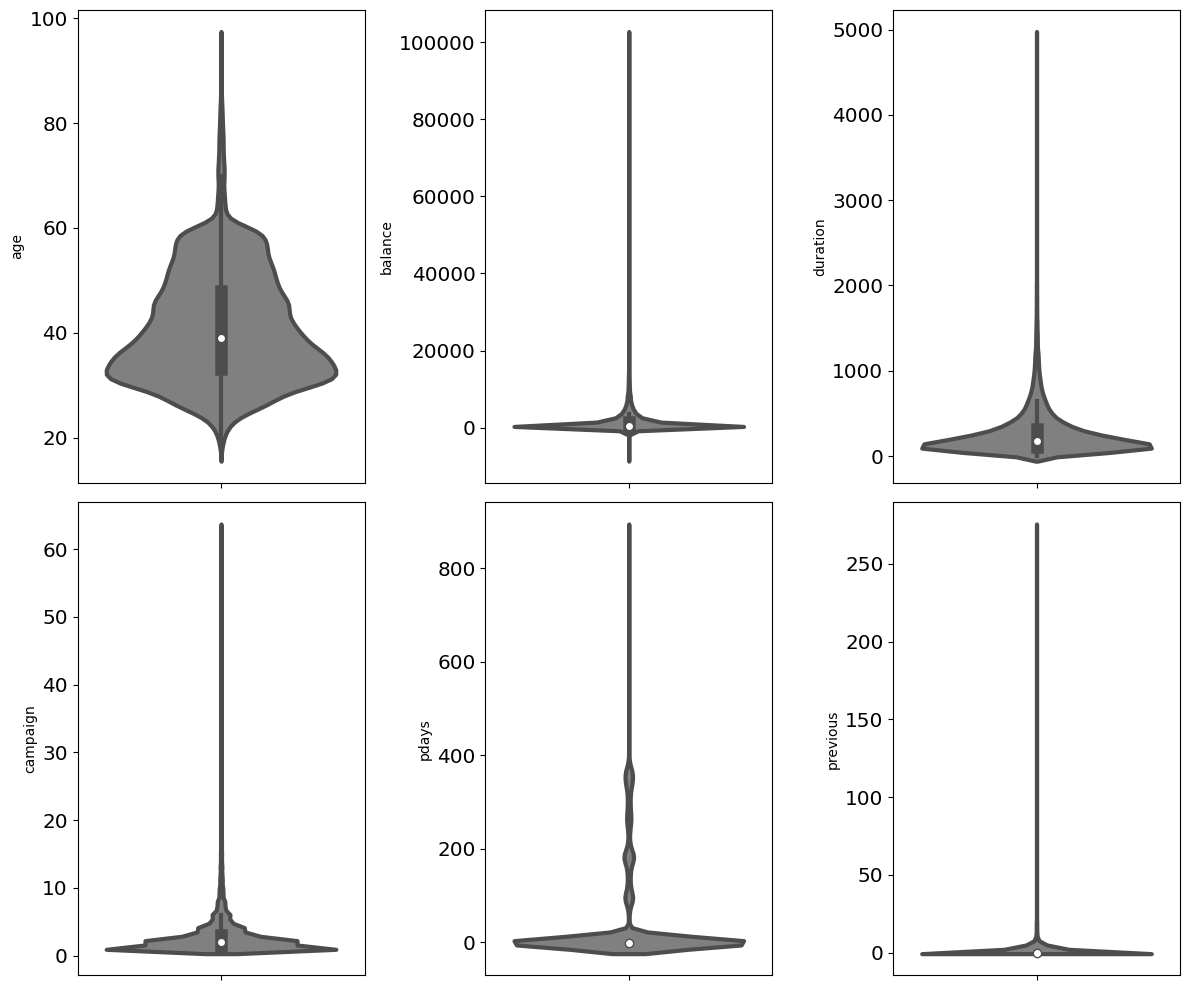

In [15]:
plt.figure(figsize=(12, 10))
num_columns = 3

for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

### - Outlier Checking (Kategori)

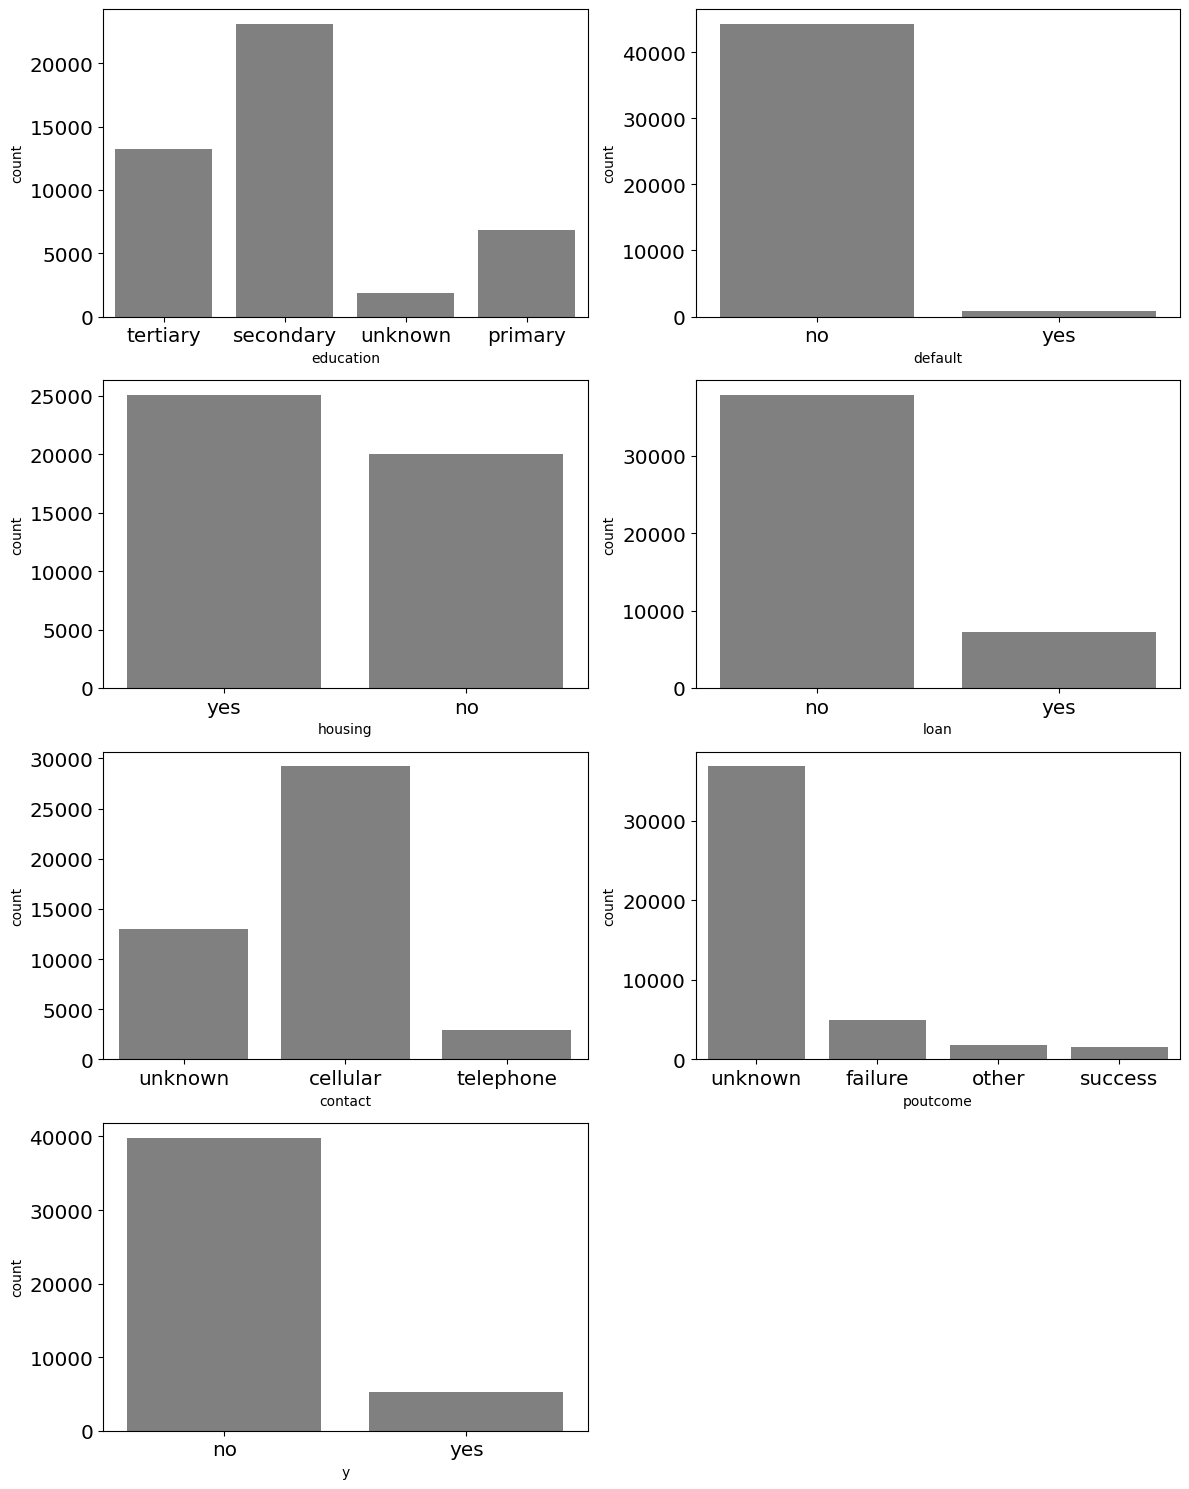

In [16]:
plt.figure(figsize=(12, 15))
num_columns = 2

for i in range(0, len(cats[2:])):
    plt.subplot(4, num_columns, i+1)
    sns.countplot(x=data[cats[2:][i]], color='gray', orient='h')
    plt.tight_layout()

### - Outlier Checking (timestamp)

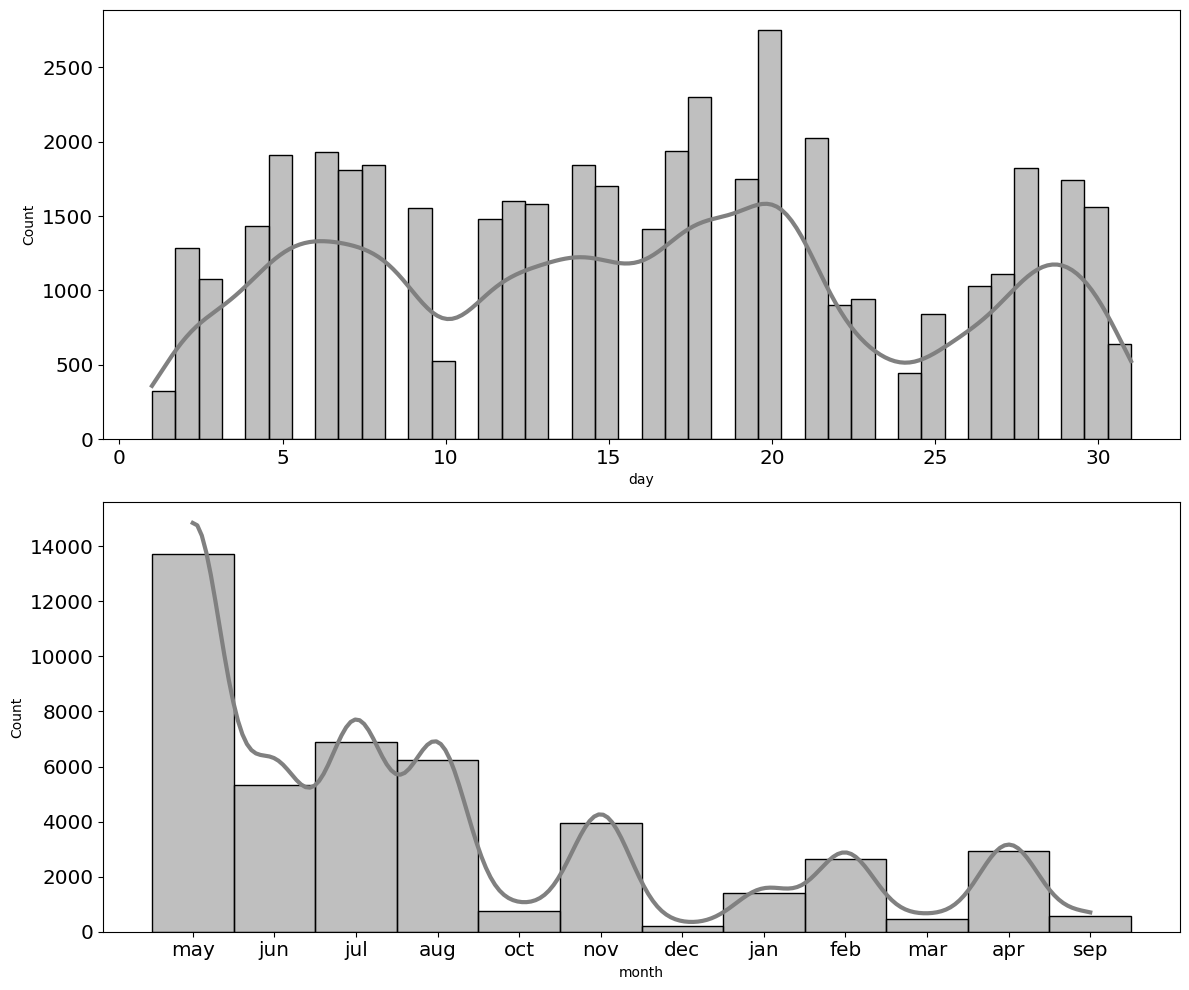

In [17]:
plt.figure(figsize=(12, 10))
num_columns = 1
for i in range(0, len(timestamp)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[timestamp[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with IQR

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in ['age','balance','duration','campaign']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries

data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 45103
Jumlah baris setelah memfilter outlier: 34615


### - After Cleansing IQR

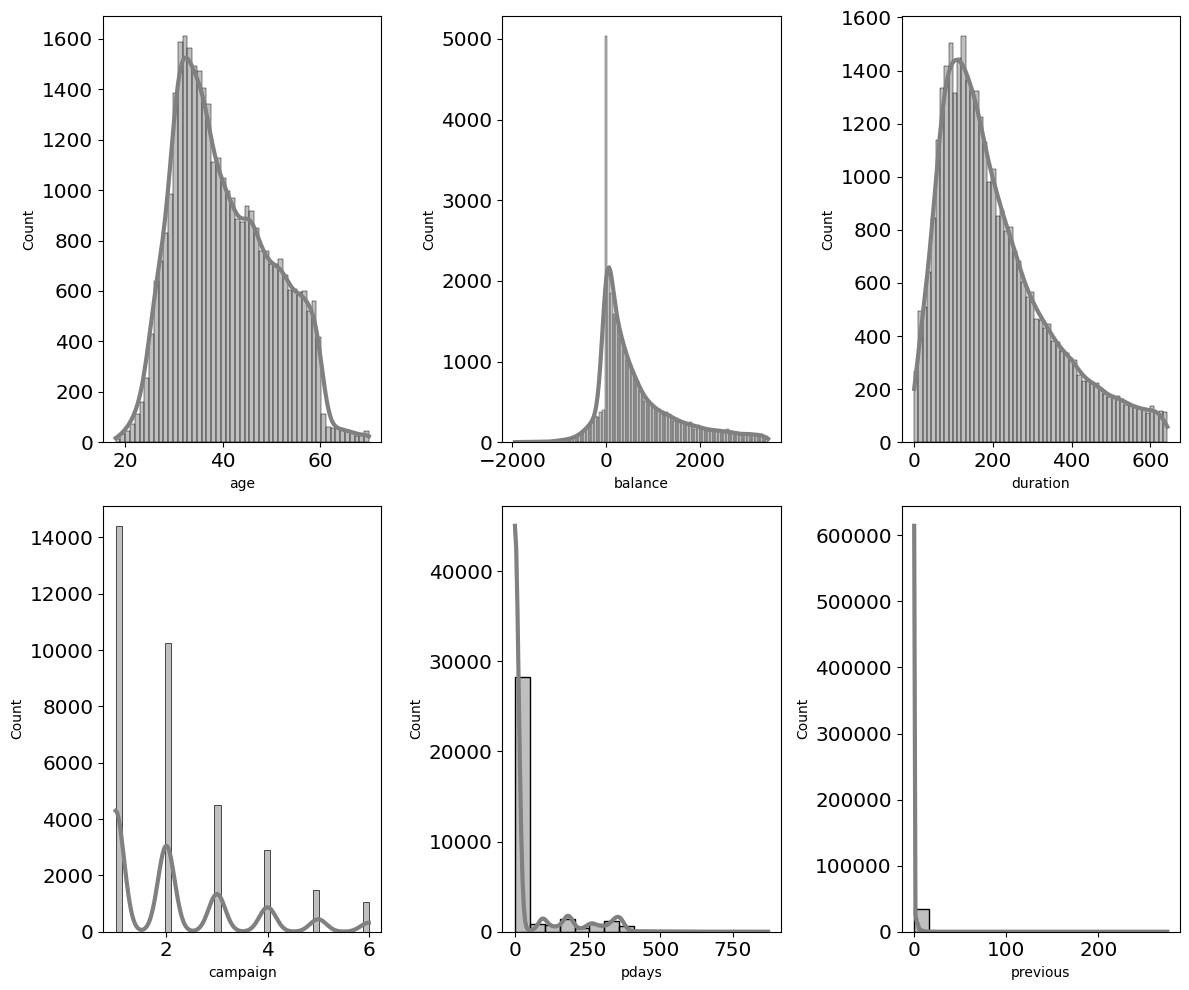

In [19]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with Z - Score

In [20]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

z_score_threshold = 2

filtered_entries = np.array([True] * len(data))
for col in ['pdays', 'previous']:
    mean_col = data[col].mean()
    std_col = data[col].std()
    z_scores = (data[col] - mean_col) / std_col
    
    # Menyaring entri berdasarkan threshold Z-score
    filtered_entries = (np.abs(z_scores) <= z_score_threshold) & filtered_entries

# Menyaring data
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 34615
Jumlah baris setelah memfilter outlier: 31180


### - Distribusi hasil IQR + Z - Score 

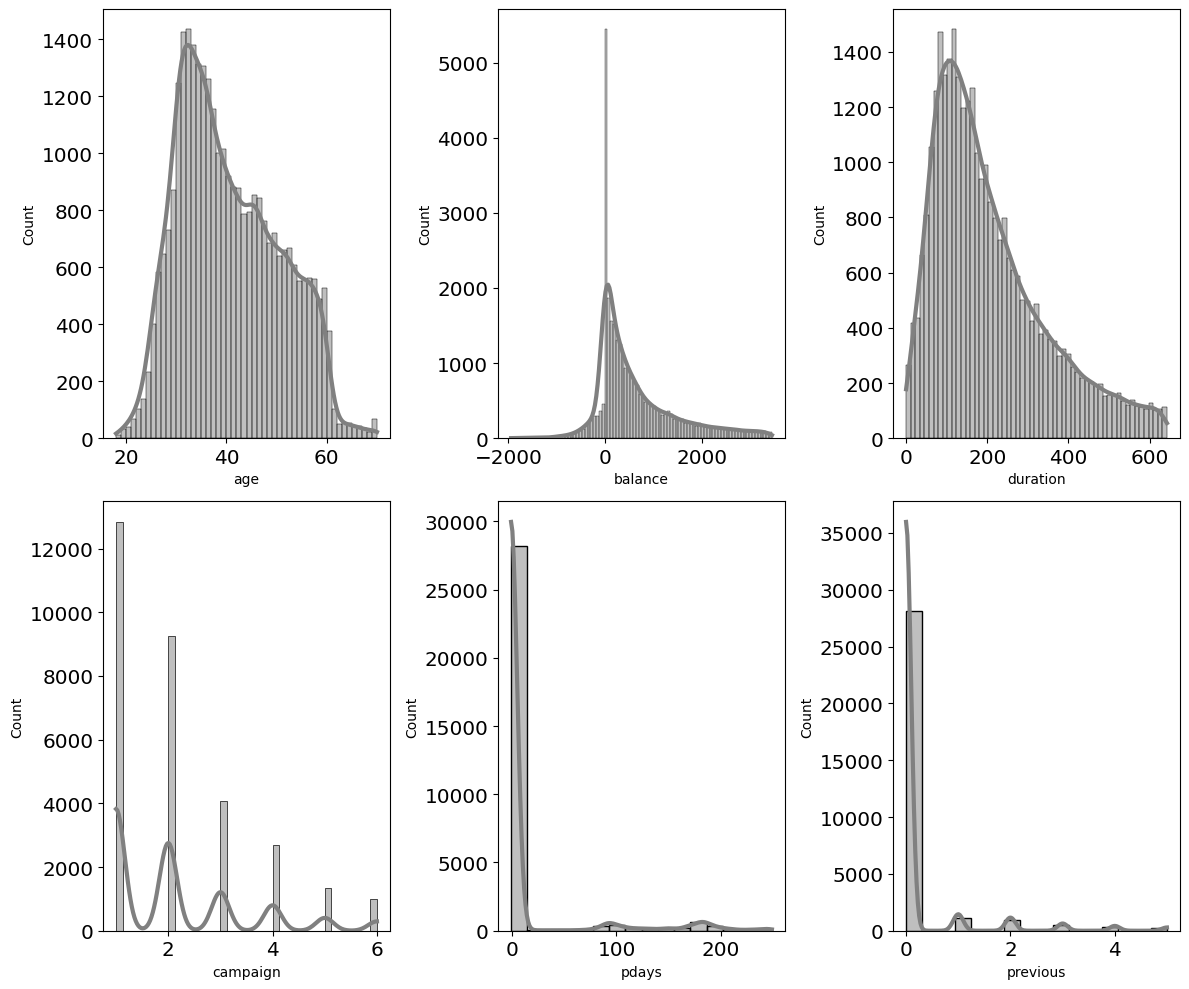

In [21]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

## d. Feature Transformation

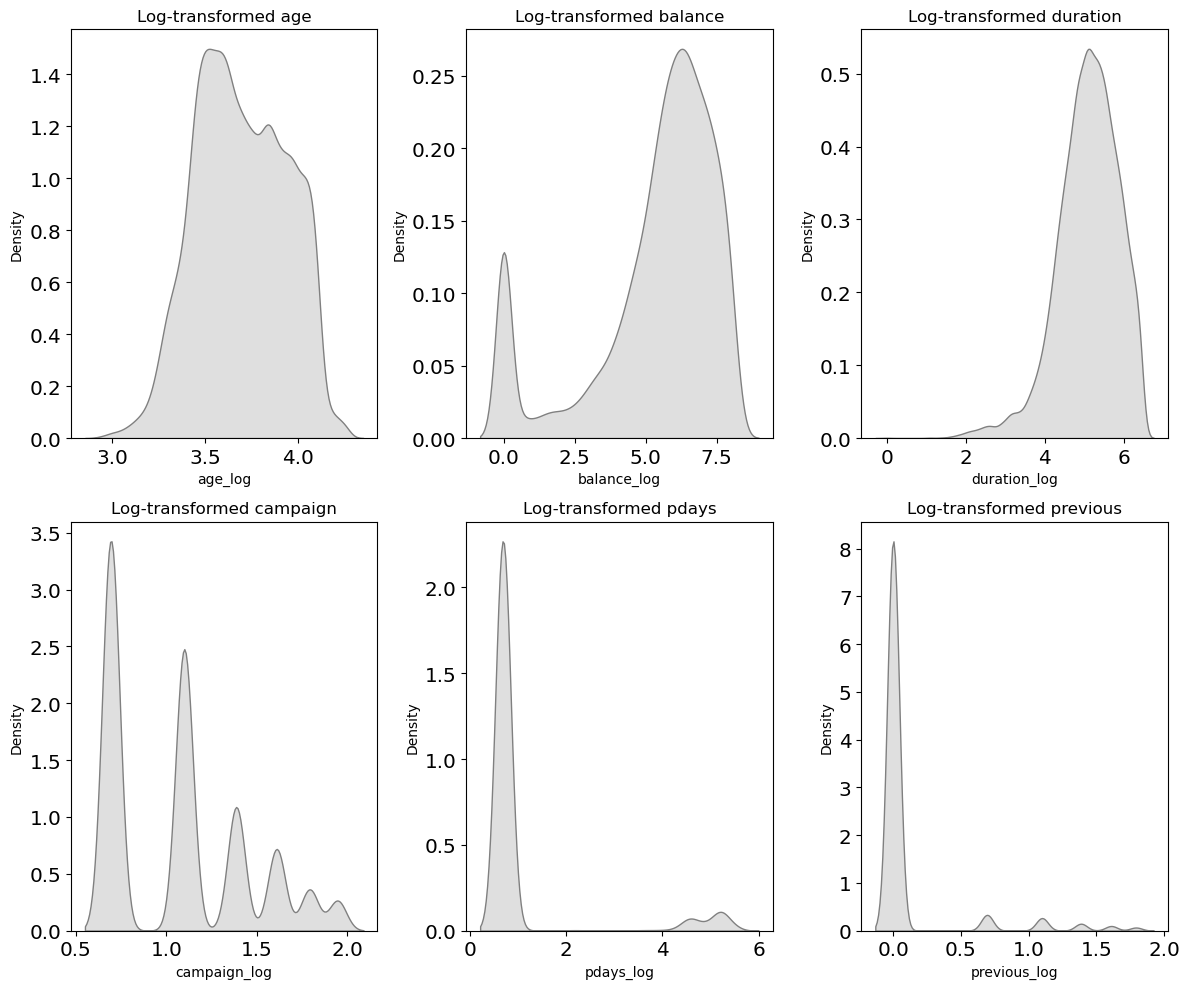

In [22]:
for col in nums:
    # menambahkan nilai kecil untuk menghindari log(0) atau log(negatif)
    data[col + '_log'] = np.log1p(np.abs(data[col]) + 1e-9)

# Plotting
plt.figure(figsize=(12, 10))
num_columns = 3  # Menentukan jumlah kolom per baris

for i in range(len(nums)):
    plt.subplot(2, num_columns, i + 1)  # Mengatur 2 baris
    sns.kdeplot(data=data[nums[i] + '_log'], color='gray', fill=True)
    plt.title(f'Log-transformed {nums[i]}')
    plt.tight_layout()

plt.show()

In [23]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log
count,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,3.118000e+04,3.118000e+04,31180.000000,31180.000000,3.118000e+04
mean,40.403432,631.490731,15.737941,206.836915,2.146921,13.218313,0.220237,3.694349,5.361007e+00,5.085426e+00,1.069900,1.101721,1.090012e-01
std,9.987446,841.388523,8.388965,139.440265,1.326395,46.393952,0.771469,0.241544,2.203112e+00,7.739083e-01,0.378915,1.252670,3.486810e-01
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.944439,1.000000e-09,1.000000e-09,0.693147,0.693147,1.000000e-09
25%,32.000000,41.000000,8.000000,102.000000,1.000000,-1.000000,0.000000,3.496508,4.644391e+00,4.634729e+00,0.693147,0.693147,1.000000e-09
50%,39.000000,339.000000,16.000000,170.000000,2.000000,-1.000000,0.000000,3.688879,5.948035e+00,5.141664e+00,1.098612,0.693147,1.000000e-09
75%,48.000000,966.000000,22.000000,280.000000,3.000000,-1.000000,0.000000,3.891820,6.889846e+00,5.638355e+00,1.386294,0.693147,1.000000e-09
max,70.000000,3457.000000,31.000000,643.000000,6.000000,249.000000,5.000000,4.262680,8.148446e+00,6.467699e+00,1.945910,5.521461,1.791759e+00


## e. Feature Encoding

### - Label Encoding

In [24]:
# jenis_kelamin & pendidikan
mapping_education = {
    'unknown' : 0,
    'primary' : 1,
    'secondary' : 2,
    'tertiary' : 3
}

mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}


mapping_y = {
    'no' : 0,
    'yes' : 1
}

data['education'] = data['education'].map(mapping_education)
data['default'] = data['default'].map(mapping_default)
data['housing'] = data['housing'].map(mapping_housing)
data['loan'] = data['loan'].map(mapping_loan)
data['month'] = data['month'].map(mapping_month)
data['y'] = data['y'].map(mapping_y)

### - One Hot Encoding

In [28]:
data = pd.get_dummies(data, columns=['job', 'marital', 'contact', 'poutcome'])

In [32]:
data.sample(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
17996,54,1,0,0,0,0,30,7,255,2,-1,0,0,4.007333,1.000000e-09,5.545177,1.098612,0.693147,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
13129,25,0,0,314,0,1,8,7,455,1,-1,0,0,3.258097,5.752573e+00,6.122493,0.693147,0.693147,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
17630,38,2,0,1655,0,0,29,7,392,2,-1,0,0,3.663562,7.412160e+00,5.973810,1.098612,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
42930,46,2,0,1144,1,0,8,2,376,2,129,3,1,3.850148,7.043160e+00,5.932245,1.098612,4.867534,1.386294e+00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
9966,35,2,0,4,0,0,9,6,130,2,-1,0,0,3.583519,1.609438e+00,4.875197,1.098612,0.693147,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1059,36,2,0,174,1,0,7,5,223,2,-1,0,0,3.610918,5.164786e+00,5.411646,1.098612,0.693147,1.000000e-09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
29668,49,2,0,780,0,0,3,2,354,5,-1,0,0,3.912023,6.660575e+00,5.872118,1.791759,0.693147,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
32419,35,2,0,124,1,0,16,4,48,4,146,5,0,3.583519,4.828314e+00,3.891820,1.609438,4.990433,1.791759e+00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
25797,58,3,0,388,0,0,19,11,96,1,-1,0,0,4.077537,5.963579e+00,4.574711,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
3381,60,1,0,751,1,0,15,5,133,1,-1,0,0,4.110874,6.622736e+00,4.897840,0.693147,0.693147,1.000000e-09,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


## f. Handle class imbalance

In [33]:
data['y'].value_counts()

0    28760
1     2420
Name: y, dtype: int64